#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Logistic Regression Lab




### Name: (your name goes here)


### Date: Sept. 16, 2020


## Goal:  The goal of this lab is demonstrate some of the main points about logistic regression.

In [13]:
# Let's import the packages we'll need.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import pandas as pd

## Binary classification for breast cancer

Let's load one of the Sci-kit learn datasets.  We'll try to make a model to predict whether a person has breast cancer.

Helper method below copied from: [Helper Method](https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset)

In [14]:
# General helper method to convert sci-kit datasets to Pandas DataFrame.
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

Let's just see how the data looks really quick.

In [15]:
cancer_dataset = datasets.load_breast_cancer() # Load the data and convert to a pandas dataframe
df = sklearn_to_df(cancer_dataset)

print(df.head()) # Print out the first five data points.


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Gather a few summary statistics about our data.

N = 569 data points


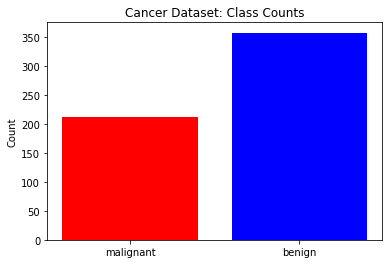

In [16]:
N = len(df) # The number of data points.
print('N = {:d} data points'.format(N))

# Give a barplot of each class.
plt.figure(1)
plt.bar([0,1], df['target'].value_counts(ascending = True), color = ['r', 'b'], tick_label = cancer_dataset.target_names)
plt.ylabel('Count')
plt.title('Cancer Dataset: Class Counts');

This dataset is unbalanced because there are more examples of benign cancer than malignant.  This is typical of many real-life datasets where we are sometimes limited in how many training examples we have.  Let's split our data into a training and test set.  We'll use a 60/40 split.

In [17]:
# Split the data.  DO NOT TOUCH THE TEST DATA FROM HERE ON!!
train_data, test_data = model_selection.train_test_split(df, test_size = 0.4) # 0.4 is 40% test data.

# Split the features from the class labels.
X_train = train_data.drop('target', axis = 1) # We drop the target from the features.  
X_test  = test_data.drop('target', axis = 1)  # Note that this does not operate inplace.
 
y_train = train_data['target']
y_test  = test_data['target']

Now that our data is loaded and split we can train a logistic regression model.  For the optimization we use the "liblinear" solver.  There are many other solvers that are also available, such as Newton CG for example.  For more information see the documentation: [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [18]:
# Now fit a logistic regression model.
model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train);

The model is trained so we can test it on our test set.  The Sci-kit metrics module contains many useful functions for this purpose.  We try out a few of them below.

In [19]:
pred = model.predict(X_test)

# See the percentage of examples that are correctly classified.
accuracy = metrics.accuracy_score(y_test, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(y_test, pred)
print("Confusion matrix = ")
print(conf_matrix)

# Precision score.
precision = metrics.precision_score(y_test, pred)
print("Precision = {:0.1f}%".format(100 * precision))

# Recall score.
recall = metrics.recall_score(y_test, pred)
print("Recall    = {:0.1f}%".format(100 * recall))

Accuracy = 95.2%
Confusion matrix = 
[[ 80   8]
 [  3 137]]
Precision = 94.5%
Recall    = 97.9%


Let's briefly explain some of these metrics.  Accuracy is obviously the percentage of all correctly classified examples in our test set.  The confusion matrix is the following matrix:
$$
C = \begin{bmatrix}
\text{Predict 0, Actual 0} & \text{Predict 0, Actual 1}\\
\text{Predict 1, Actual 0} & \text{Predict 1, Actual 1}
\end{bmatrix}
$$
Notice that the diagonal entries are the examples that are correctly classified.  The precision score is the percentage 
$$
\text{Precision } = \frac{C_{00}}{C_{00} + C_{01}}
$$
so it is the percentage of predicted malignant tumors that we classify correctly.  On the other hand, recall is
$$
\text{Recall } = \frac{C_{00}}{C_{00} + C_{10}}
$$
so it is the percentage of malignant tumors that we classify correctly.  Note that these are two different quantities.

Using multiple evaluation metrics helps give a better picture of how well our classifier is doing.

## Multiclass Classification

Multiclass classification is just when we have more than 2 classes.  Instead of modeling the posterior class probabilities as Bernoulli random variables, we can model them as multinomial random variables for example.  The example we'll consider here is the classic Iris dataset by Fisher (a prominent early statistician).  Let's load the data below.

In [20]:
# Load the data and convert it into a Pandas dataframe.
iris_data = datasets.load_iris()
df = sklearn_to_df(iris_data)

# Print the first 5 examples to see how the data looks.
print("N = ", len(df))
print(df.head())

N =  150
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


We'll again use a 60/40 split for our training/test sets.

In [21]:
# Split the data.  DO NOT TOUCH THE TEST DATA FROM HERE ON!!
train_data, test_data = model_selection.train_test_split(df, test_size = 0.4) # 0.4 is 40% test data.

# Split the features from the class labels.
X_train = train_data.drop('target', axis = 1) # We drop the target from the features.  
X_test  = test_data.drop('target', axis = 1)  # Note that this does not operate inplace.
 
y_train = train_data['target']
y_test  = test_data['target']

Since we have less data (only 150 samples) we could not really afford to divide up our data into a training, validation, and test set.  However, we can still get an estimate of how our model will perform on our test set using cross-validation.  Here we will use $k$-fold cross-validation with $k=10$.  This works by splitting the training data into 10 disjoint sets.  We then leave out one of these sets and train our model on the remaining 9 sets and treat the left out set as a validation set.  We repeat this a total of 10 times and average the validation scores.  If $k = N$ is the number of samples, then this is also called leave one out cross-validation (LOOCV).  Note that using $k$-fold cross-validation is more expensive than if we had a separate validation set to begin with because we have to train our model many times.

Cross-validation will become more useful when we have a hyperparameter to control during training and want to see which value of the hyperparameter will give the best results.

Below we compare 2 logistic regression models using cross-validation.  The first model is trained on all of the features whereas the second model is only trained on "sepal length" and "sepal width".

In [22]:
# Get the 2 different models.
model1 = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
model2 = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')

X_train2 = X_train[['sepal length (cm)', 'sepal width (cm)']]

# k-fold cross-validation.
k = 25
splitter = model_selection.KFold(k)

# Compute cross-validation scores.
cv_scores1 = model_selection.cross_val_score(model1, X_train, y_train, cv = splitter)
cv_scores2 = model_selection.cross_val_score(model2, X_train2, y_train, cv = splitter)

# Print the means of the scores.
print("Model 1 CV score = ", np.mean(cv_scores1))
print("Model 2 CV score = ", np.mean(cv_scores2))

Model 1 CV score =  0.9766666666666666
Model 2 CV score =  0.7766666666666666


### Learning curves

We can also look to see how our two models perform when given additional training examples.  A learning curve shows the tradeoff between the number of samples we use to train and the model's predictive accuracy.  We plot the learning curves for our two models below.

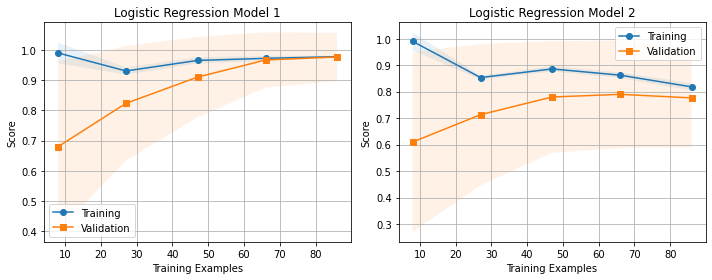

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

train_sizes1, train_scores1, test_scores1 = model_selection.learning_curve(model1, X_train, y_train, cv = splitter)
train_sizes2, train_scores2, test_scores2 = model_selection.learning_curve(model2, X_train2, y_train, cv = splitter)

train_scores_mean1 = np.mean(train_scores1, axis = 1)
test_scores_mean1  = np.mean(test_scores1, axis = 1)
train_scores_std1  = np.std(train_scores1, axis = 1)
test_scores_std1   = np.std(test_scores1, axis = 1)

train_scores_mean2 = np.mean(train_scores2, axis = 1)
test_scores_mean2  = np.mean(test_scores2, axis = 1)
train_scores_std2  = np.std(train_scores2, axis = 1)
test_scores_std2   = np.std(test_scores2, axis = 1)

ax1.set_title('Logistic Regression Model 1')
ax1.plot(train_sizes1, train_scores_mean1, 'o-', label = 'Training')
ax1.plot(train_sizes1, test_scores_mean1, 's-', label = 'Validation')
ax1.fill_between(train_sizes1, train_scores_mean1 - train_scores_std1, train_scores_mean1 + train_scores_std1, alpha = 0.1)
ax1.fill_between(train_sizes1, test_scores_mean1 - test_scores_std1, test_scores_mean1 + test_scores_std1, alpha = 0.1)
ax1.set_xlabel('Training Examples')
ax1.set_ylabel('Score')
ax1.grid()
ax1.legend()

ax2.set_title('Logistic Regression Model 2')
ax2.plot(train_sizes2, train_scores_mean2, 'o-', label = 'Training')
ax2.plot(train_sizes2, test_scores_mean2, 's-', label = 'Validation')
ax2.fill_between(train_sizes2, train_scores_mean2 - train_scores_std2, train_scores_mean2 + train_scores_std2, alpha = 0.1)
ax2.fill_between(train_sizes2, test_scores_mean2 - test_scores_std2, test_scores_mean2 + test_scores_std2, alpha = 0.1)
ax2.set_xlabel('Training Examples')
ax2.set_ylabel('Score')
ax2.grid()
ax2.legend()

plt.tight_layout();

### Evaluate the models.

Finally, we actually evaluate our two models on our test set.  The first model has a higher cross-validation score so we expect it to do better on the test set.

In [24]:
model1.fit(X_train, y_train)
model2.fit(X_train2, y_train)

pred1 = model1.predict(X_test)

X_test2 = X_test[['sepal length (cm)', 'sepal width (cm)']]
pred2 = model2.predict(X_test2)

# Get the percent of correctly classified results.
acc1 = metrics.accuracy_score(pred1, y_test)
acc2 = metrics.accuracy_score(pred2, y_test)

print("Logistic regression model accuracy (all features) = {:0.1f}%".format(100 * acc1))
print("Logistic regression model accuracy (2 features)   = {:0.1f}%".format(100 * acc2))

Logistic regression model accuracy (all features) = 95.0%
Logistic regression model accuracy (2 features)   = 76.7%


As we'd expect, training with more features gives us a more flexible model.  Excluding the remaining features is equivalent to setting their weights to 0.  Thus, we are solving a constrained minimization problem when we train, which will worse than solving the unconstrained problem where we are using all of the features.